In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pympler.asizeof import asizeof

In [52]:
image = Image.open('china-original.png')
image = np.array(image,np.uint8)

In [53]:
svd_channels = [np.linalg.svd(image[:,:,i]) for i in range(3)]
components = []
compressed_image = []
for U, s, V in svd_channels:
    [i] = min(np.argwhere(np.cumsum(s/sum(s))>.5))
    components.append(i)
    compressed_image.append((U[:,:i], np.diag(s[:i]), V[:i,:]))

In [ ]:
decompressed_image = np.empty(image.shape,np.uint8)
for index, (U, s, V) in enumerate(compressed_image):
    decompressed_image[:, :, index] = (U@s@V).clip(0,255)

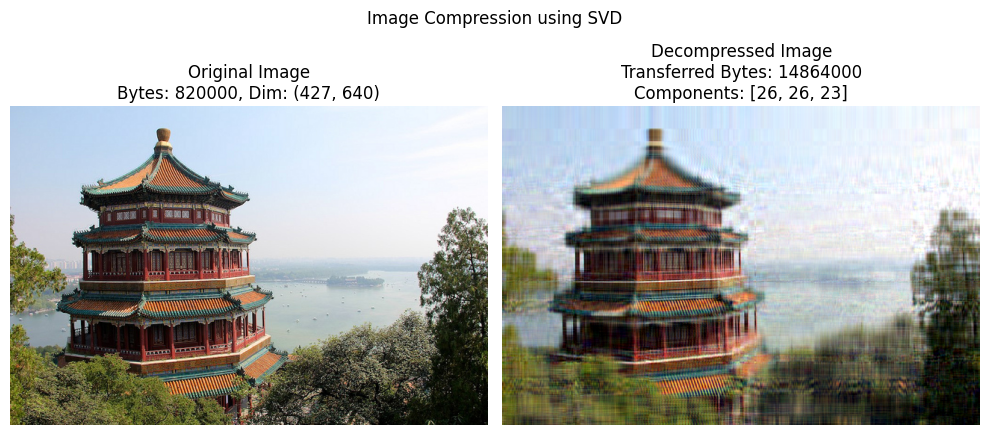

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Image Compression using SVD')
axes[0].set_title(f'Original Image\nBytes: {asizeof(image)}, Dim: {image.shape[:2]}')
axes[0].axis('off')
axes[0].imshow(image)
axes[1].set_title(f'Decompressed Image\nTransferred Bytes: {asizeof(compressed_image)}\nComponents: {components}')
axes[1].axis('off')
axes[1].imshow(decompressed_image)
plt.tight_layout()
plt.show()